In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("C:/Users/parit/Downloads/iphone_purchase_records.csv")

In [3]:
data.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [4]:
f= lambda x:0 if x=="Male" else 1
data.Gender=data.Gender.apply(f)   ## 0 is for male and 1 is for female

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           400 non-null    int64
 1   Age              400 non-null    int64
 2   Salary           400 non-null    int64
 3   Purchase Iphone  400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


In [6]:
data.describe()

,Gender,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000,400.000000
mean,0.510000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,1.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


In [7]:
data.shape

(400, 4)

In [8]:
data.isnull().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

## EDA

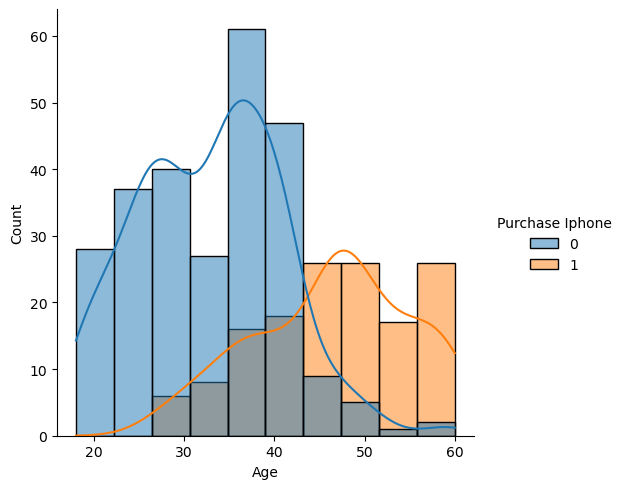

In [9]:
sns.displot(x=data.Age,hue=data["Purchase Iphone"],data=data,kde=True)

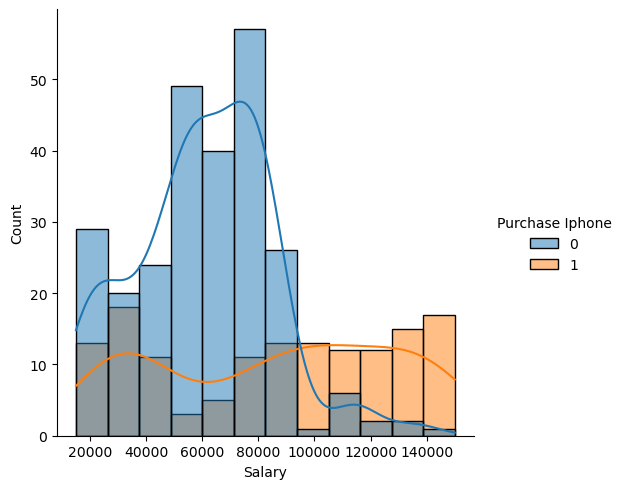

In [10]:
sns.displot(x=data.Salary,hue=data["Purchase Iphone"],data=data,kde=True)

<Axes: xlabel='Gender', ylabel='count'>

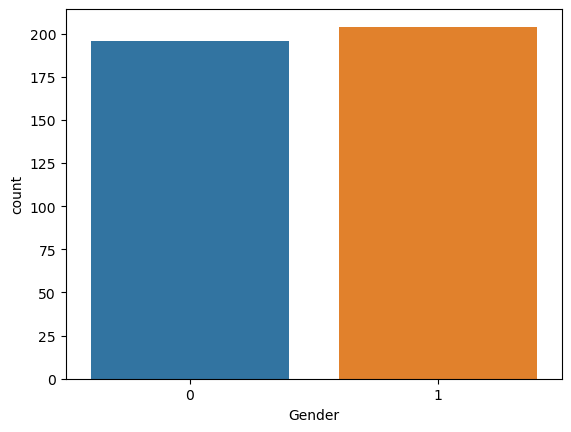

In [11]:
sns.countplot(x=data.Gender,data=data)

<Axes: xlabel='Gender', ylabel='count'>

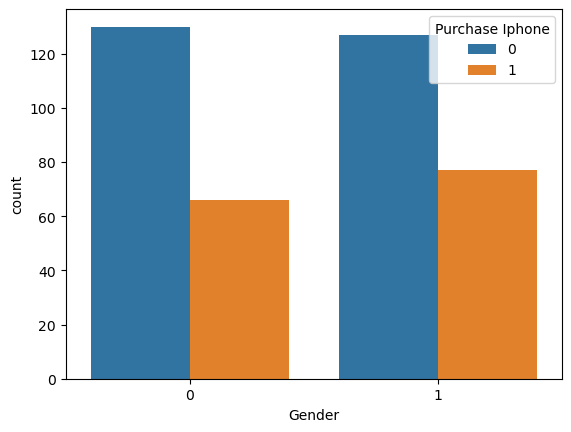

In [12]:
sns.countplot(x=data.Gender,hue=data["Purchase Iphone"],data=data)

<Axes: xlabel='Age', ylabel='Salary'>

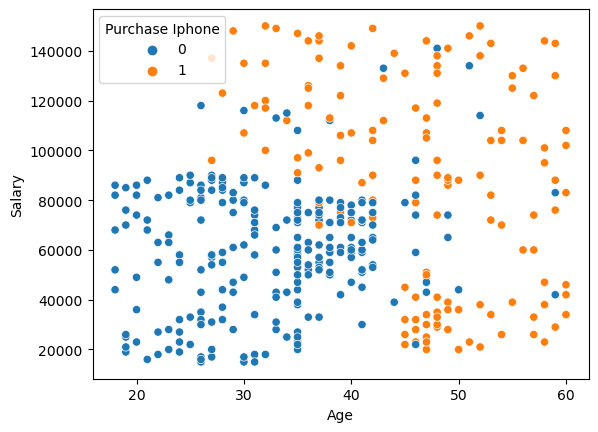

In [13]:
sns.scatterplot(x=data.Age,y=data.Salary,hue=data["Purchase Iphone"],data=data)

<Axes: >

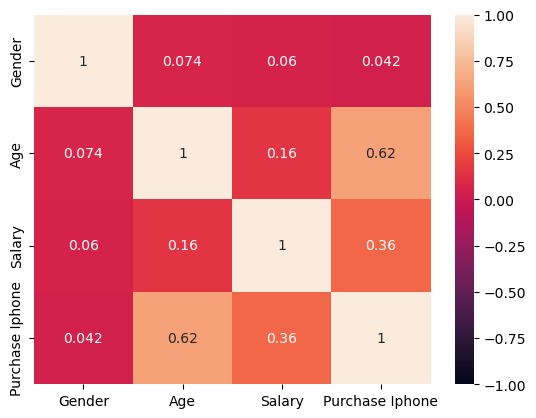

In [14]:
sns.heatmap(data.corr(),vmin=-1,annot=True)

In [15]:
y=data["Purchase Iphone"]
x=data[["Gender","Age","Salary"]]

## Decision tree model

In [16]:
from sklearn.model_selection import train_test_split

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dt=DecisionTreeClassifier(criterion='entropy',random_state=42)

In [48]:
model=dt.fit(x_train,y_train)

In [49]:
pred=model.predict(x_test)

In [50]:
pred

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0], dtype=int64)

In [51]:
from sklearn.metrics import accuracy_score,confusion_matrix,auc,roc_curve

In [52]:
print("training score =",model.score(x_train,y_train))
print("testing score =",accuracy_score(y_test,pred))

training score = 0.996875
testing score = 0.8875


In [53]:
print("confusion matrix \n",confusion_matrix(y_test,pred))

confusion matrix 
 [[45  6]
 [ 3 26]]


In [55]:
model.predict_proba(x_test)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [56]:
x_test

,Gender,Age,Salary
331,1,48,119000
92,0,26,15000
1,0,35,20000
234,1,38,112000
136,1,20,82000
...,...,...,...
393,0,60,42000
151,0,41,45000
126,0,42,65000
265,1,42,108000


In [57]:
x_test["Actual"]=y_test
x_test["Predicted"]=pred
x_test

,Gender,Age,Salary,Actual,Predicted
331,1,48,119000,1,1
92,0,26,15000,0,0
1,0,35,20000,0,0
234,1,38,112000,0,1
136,1,20,82000,0,0
...,...,...,...,...,...
393,0,60,42000,1,1
151,0,41,45000,0,0
126,0,42,65000,0,0
265,1,42,108000,1,1
